# Water Quality Classification

Downloading the dataset

In [4]:
! kaggle datasets download -d ozgurdogan646/water-quality-dataset
! unzip -o -q water-quality-dataset.zip
! rm water-quality-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset
License(s): other




  0%|          | 0.00/285k [00:00<?, ?B/s]
100%|██████████| 285k/285k [00:00<00:00, 79.9MB/s]


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('waterPollution.csv')
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [7]:
df.shape

(20000, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

In [9]:
df.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,...,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,...,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,...,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,...,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,...,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,...,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [10]:
df.isna().sum()

parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                        104
PopulationDensity                              107
TerraMarineProtected_2016_2018                 107
TouristMean_1990_2020                          107
VenueCount                                       0
netMigration_2011_2018                         107
droughts_floods_temperature                    107
literacyRate_2010_2018                         107
combustibleRenewables_2009_2014                107
gdp                                            107
composition_food_organic_waste_

In [11]:
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict
null_dict = isnull_prop(df)

df_missing = pd.DataFrame.from_dict(null_dict,
                                    orient="index",
                                    columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
parameterWaterBodyCategory,0,0.00000
observedPropertyDeterminandCode,0,0.00000
procedureAnalysedFraction,0,0.00000
procedureAnalysedMedia,0,0.00000
resultUom,0,0.00000
phenomenonTimeReferenceYear,0,0.00000
parameterSamplingPeriod,0,0.00000
resultMeanValue,0,0.00000
waterBodyIdentifier,0,0.00000
Country,104,0.00520


In [12]:
df['resultUom'].unique()

array(['mg{NO2}/L', '{massRatio}', 'mg{NO3}/L', 'mmol/L', 'mg{P}/L', '%',
       'mg{N}/L', '[pH]', 'mg{Si}/L', 'mg{O2}/L', 'mg{NH4}/L', 'ug/L',
       'uS/cm', 'mg/L', 'Cel', 'mg{C}/L', 'mg{NH3}/L', 'mg{PO4}/L',
       'mg{CaCO3}/L'], dtype=object)

In [13]:
df['resultMeanValue']

0          0.063310
1          0.046733
2        132.859000
3         11.578376
4          0.206800
            ...    
19995      0.092466
19996     89.908300
19997     18.901608
19998    307.307000
19999      7.954790
Name: resultMeanValue, Length: 20000, dtype: float64

# Data Labeling

Here are some sources where we can find detailed information on water quality standards and thresholds:


1. *Environmental Protection Agency (EPA)*:
   - The EPA sets standards for drinking water quality in the United States, which include maximum contaminant levels (MCLs) for various substances.
   - EPA National Primary Drinking Water Regulations: [EPA Drinking Water Standards](https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations)
   
   Last updated on January 2, 2024

2. *World Health Organization (WHO)*:
   - The WHO provides comprehensive guidelines on drinking water quality, including acceptable limits for various contaminants.
   - WHO Guidelines for Drinking-water Quality: [WHO Drinking Water Quality Guidelines](https://www.who.int/publications/i/item/9789240045064)

  24 April 2017 | Guideline

3. *European Union (EU)*:
   - The EU has its own set of water quality standards, outlined in the Drinking Water Directive.
   - EU Drinking Water Directive: [EU Drinking Water Directive](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32020L2184)
   
   23 Desember 2020

4. *Canadian Council of Ministers of the Environment (CCME)*:
   - The CCME provides guidelines for water quality in Canada, including drinking water and aquatic life protection.
   - CCME Water Quality Guidelines: [CCME Guidelines](https://ccme.ca/en/summary-table)

   Last updated on 2018

5. *Australian Drinking Water Guidelines (ADWG)*:
   - The ADWG provides detailed guidelines for safe drinking water in Australia.
   - Australian Drinking Water Guidelines: [ADWG Guidelines](https://www.nhmrc.gov.au/about-us/publications/australian-drinking-water-guidelines)
   
   Current | 2011


In [14]:
regulatory_limits = {
    'mg{NO2}/L': (0.0, 1.0),        # Nitrite
    'mg{NO3}/L': (0.0, 10.0),       # Nitrate
    'mg{NH4}/L': (0.0, 0.5),        # Ammonium
    'mg{PO4}/L': (0.0, 0.3),        # Phosphate
    'mg{CaCO3}/L': (0.0, 200.0),    # Calcium Carbonate (hardness)
    'mg{P}/L': (0.0, 0.1),          # Phosphorus
    'mg{N}/L': (0.0, 1.0),          # Nitrogen
    'mg{Si}/L': (0.0, 2.0),         # Silicon
    'mg{O2}/L': (5.0, 14.0),         # Dissolved Oxygen
    'uS/cm': (0.0, 1000.0),         # Conductivity
    # 'mg/L': (0.0, 1.0),             # General parameter, assuming generic pollutants
    'Cel': (0.0, 40.0),             # Temperature
    # 'mg{C}/L': (0.0, 2.0),          # Carbon
    'mg{NH3}/L': (0.0, 0.2),        # Ammonia
    '[pH]': (6.5, 8.5),             # pH value
}

# Function to label the data
def label_water_quality(row, limits):
    uom = row['resultUom']
    value = row['resultMeanValue']

    if uom not in limits:
        return 'undefined'
    elif isinstance(limits[uom], tuple):
        lower_bound, upper_bound = limits[uom]
        if value < lower_bound or value > upper_bound:
            return 'dirty'
        else:
            return 'clean'
    elif value > limits[uom]:
        return 'dirty'
    else:
        return 'clean'

# Apply the function to the DataFrame
df['water_quality'] = df.apply(label_water_quality, axis=1, limits=regulatory_limits)

# Print the DataFrame with the new column 'water_quality'
print(df[['resultUom', 'resultMeanValue', 'water_quality']])

         resultUom  resultMeanValue water_quality
0        mg{NO2}/L         0.063310         clean
1        mg{NO2}/L         0.046733         clean
2      {massRatio}       132.859000     undefined
3        mg{NO3}/L        11.578376         dirty
4           mmol/L         0.206800     undefined
...            ...              ...           ...
19995    mg{NO2}/L         0.092466         clean
19996            %        89.908300     undefined
19997    mg{NO3}/L        18.901608         dirty
19998  {massRatio}       307.307000     undefined
19999         [pH]         7.954790         clean

[20000 rows x 3 columns]


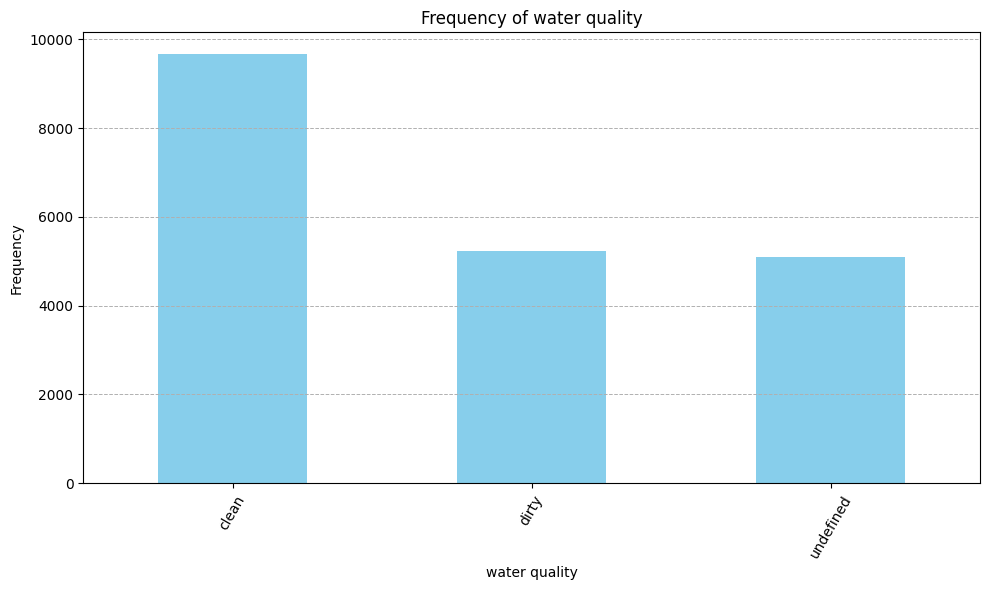

In [15]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [16]:
df[df['water_quality']  == 'undefined']['observedPropertyDeterminandCode'].value_counts()

observedPropertyDeterminandCode
EEA_3131-01-9     1145
EEA_3164-08-7      886
EEA_3164-07-6      564
EEA_3164-01-0      505
EEA_3133-06-0      464
                  ... 
CAS_218-01-9         1
CAS_120-82-1         1
CAS_7440-62-2        1
CAS_74-83-9          1
CAS_37680-73-2       1
Name: count, Length: 162, dtype: int64

In [17]:
# df[df['observedPropertyDeterminandCode'] == 'EEA_3151-01-7']['resultMeanValue'].describe()
df[df['observedPropertyDeterminandCode'] == 'EEA_3151-01-7']

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.2068,ES014MSPFES-014-NR-038-000-02-02,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
293,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,1.9880,ES12113,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
296,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,2.6149,ES12120,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
436,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,4.5979,ES030MSPF0427021,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
445,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,4.0010,ES030MSPF0434021,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19535,RW,EEA_3151-01-7,total,water,mmol/L,2010,2010-01--2010-12,5.6943,ES030MSPF0142010,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19538,RW,EEA_3151-01-7,total,water,mmol/L,2010,2010-01--2010-12,0.7746,ES018MSPFES199MAR001790,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19608,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,3.1643,ES080MSPF10-11,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19621,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,5.6493,ES080MSPF18-26,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined


In [18]:
regulatory_limits = {
    'EEA_3131-01-9' : (90, 110),
    'EEA_3164-08-7' : (0,10000),
    'EEA_3164-07-6' : (0,10000),
    'EEA_3164-01-0' : (0,10),
    'EEA_3133-06-0' : (0,25)
}

# Function to label the data
def label_water_quality(row, limits):
    x = row['observedPropertyDeterminandCode']
    value = row['resultMeanValue']

    if x not in limits:
        return row['water_quality']
    elif isinstance(limits[x], tuple):
        lower_bound, upper_bound = limits[x]
        if value < lower_bound or value > upper_bound:
            return 'dirty'
        else:
            return 'clean'
    elif value > limits[x]:
        return 'dirty'
    else:
        return 'clean'

# Apply the function to the DataFrame
df['water_quality'] = df.apply(label_water_quality, axis=1, limits=regulatory_limits)

# Print the DataFrame with the new column 'water_quality'
print(df[['observedPropertyDeterminandCode', 'resultMeanValue', 'water_quality']])

      observedPropertyDeterminandCode  resultMeanValue water_quality
0                      CAS_14797-65-0         0.063310         clean
1                      CAS_14797-65-0         0.046733         clean
2                       EEA_3164-07-6       132.859000         clean
3                      CAS_14797-55-8        11.578376         dirty
4                       EEA_3151-01-7         0.206800     undefined
...                               ...              ...           ...
19995                  CAS_14797-65-0         0.092466         clean
19996                   EEA_3131-01-9        89.908300         dirty
19997                  CAS_14797-55-8        18.901608         dirty
19998                   EEA_3164-08-7       307.307000         clean
19999                   EEA_3152-01-0         7.954790         clean

[20000 rows x 3 columns]


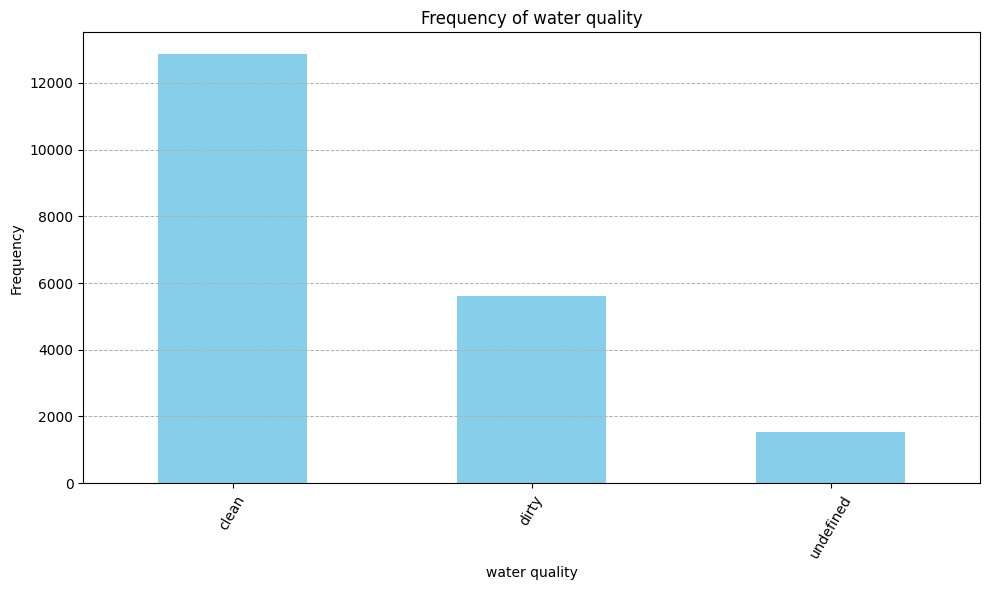

In [19]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [20]:
df = df[df['water_quality'] != 'undefined'].copy()

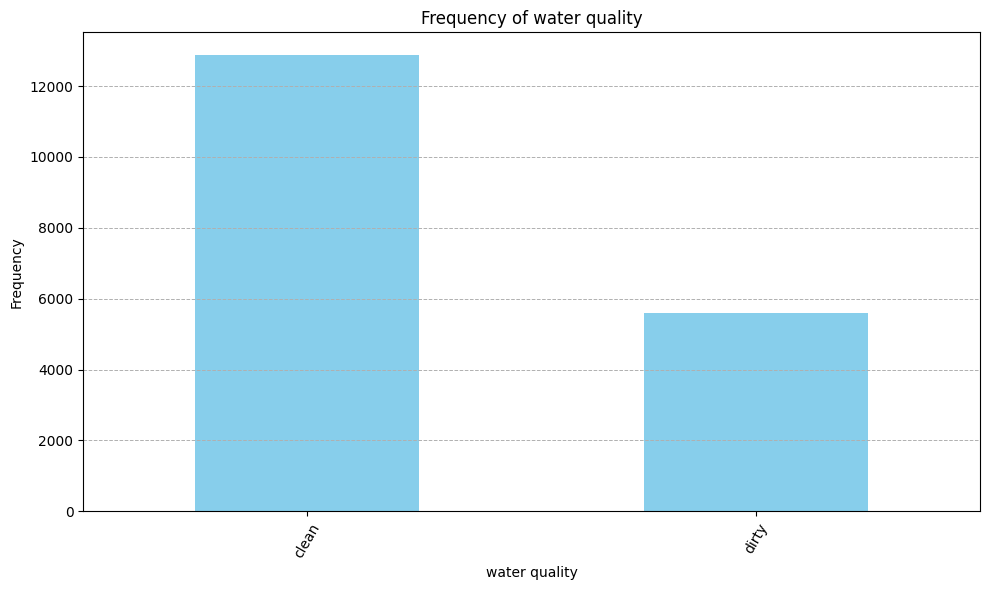

In [21]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

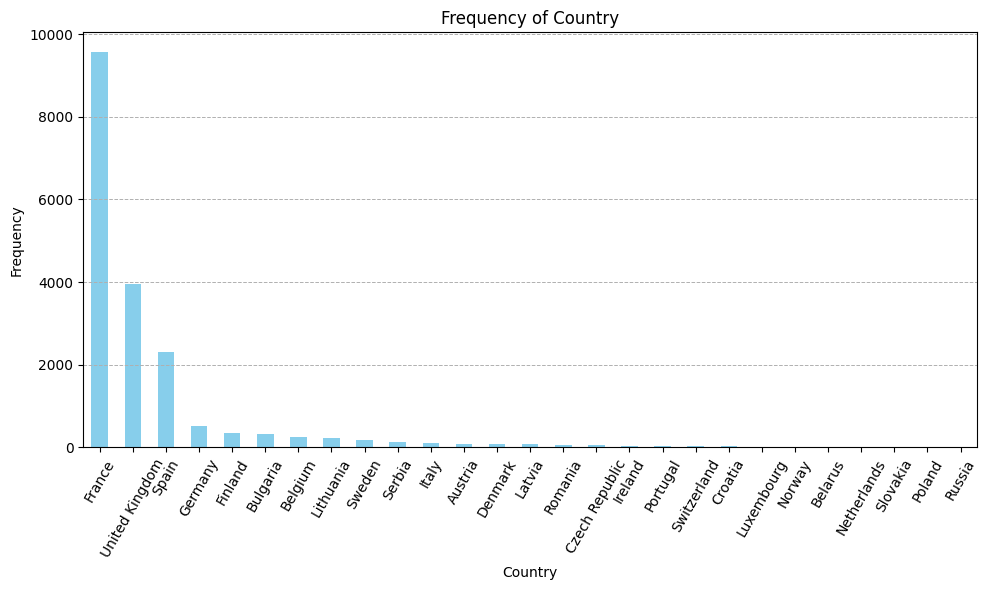

In [22]:
# Create frequency table for resultUom
frequency_table = df['Country'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

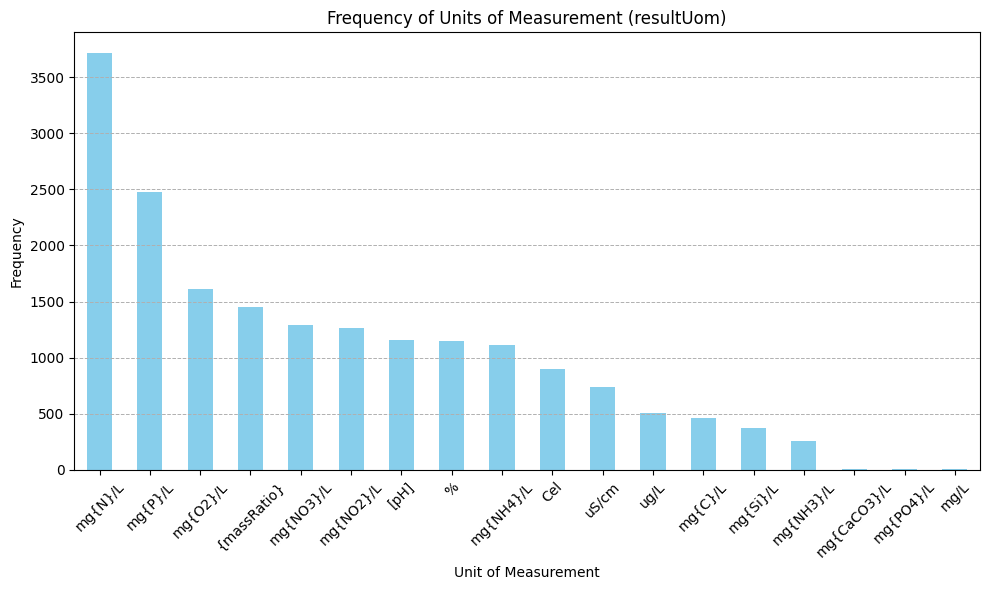

In [23]:
# Create frequency table for resultUom
frequency_table = df['resultUom'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of Units of Measurement (resultUom)')
plt.xlabel('Unit of Measurement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
df['observedPropertyDeterminandCode'].unique()

array(['CAS_14797-65-0', 'EEA_3164-07-6', 'CAS_14797-55-8',
       'CAS_7723-14-0', 'EEA_3164-08-7', 'EEA_3131-01-9', 'EEA_3161-03-3',
       'EEA_3152-01-0', 'EEA_3163-01-7', 'EEA_3133-01-5',
       'CAS_14265-44-2', 'EEA_3161-01-1', 'EEA_3161-05-5',
       'CAS_14798-03-9', 'EEA_3164-01-0', 'EEA_3142-01-6',
       'EEA_31615-01-7', 'EEA_3121-01-5', 'EEA_3161-02-2',
       'EEA_3133-03-7', 'EEA_3133-02-6', 'EEA_3133-06-0', 'EEA_3133-04-8',
       'EEA_31613-01-1', 'EEA_31-01-6', 'EEA_3132-01-2'], dtype=object)

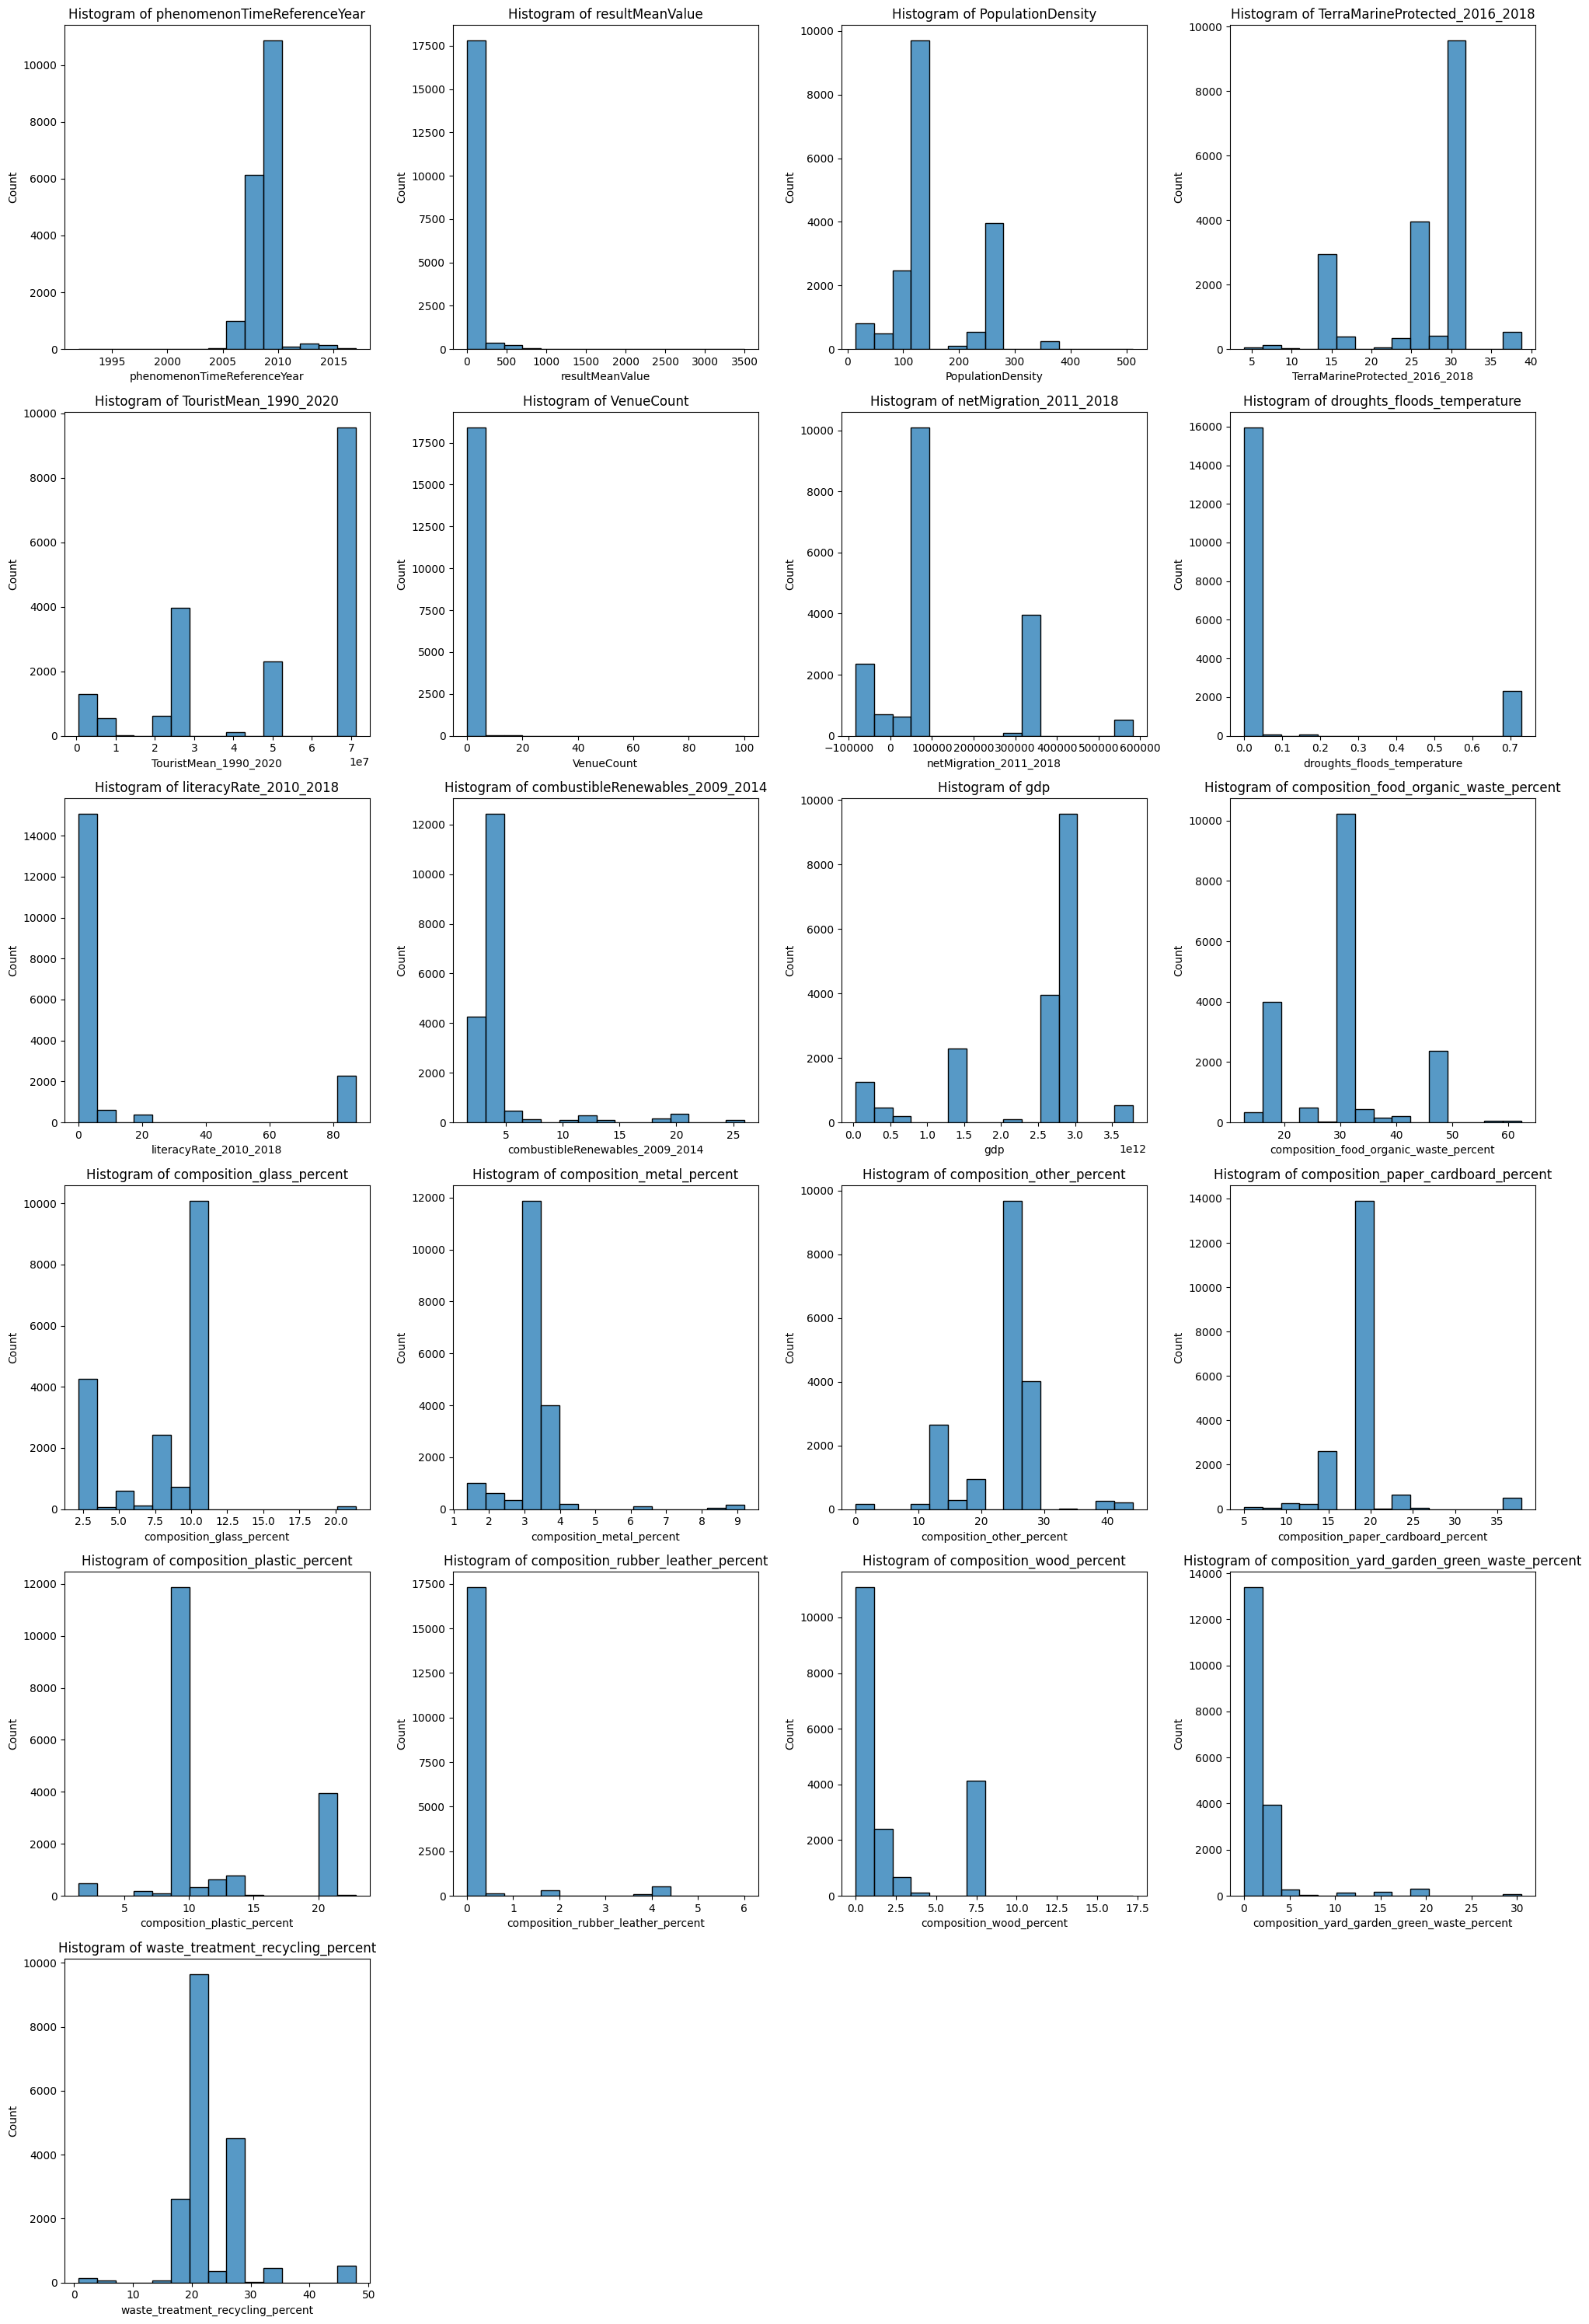

In [25]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=15, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

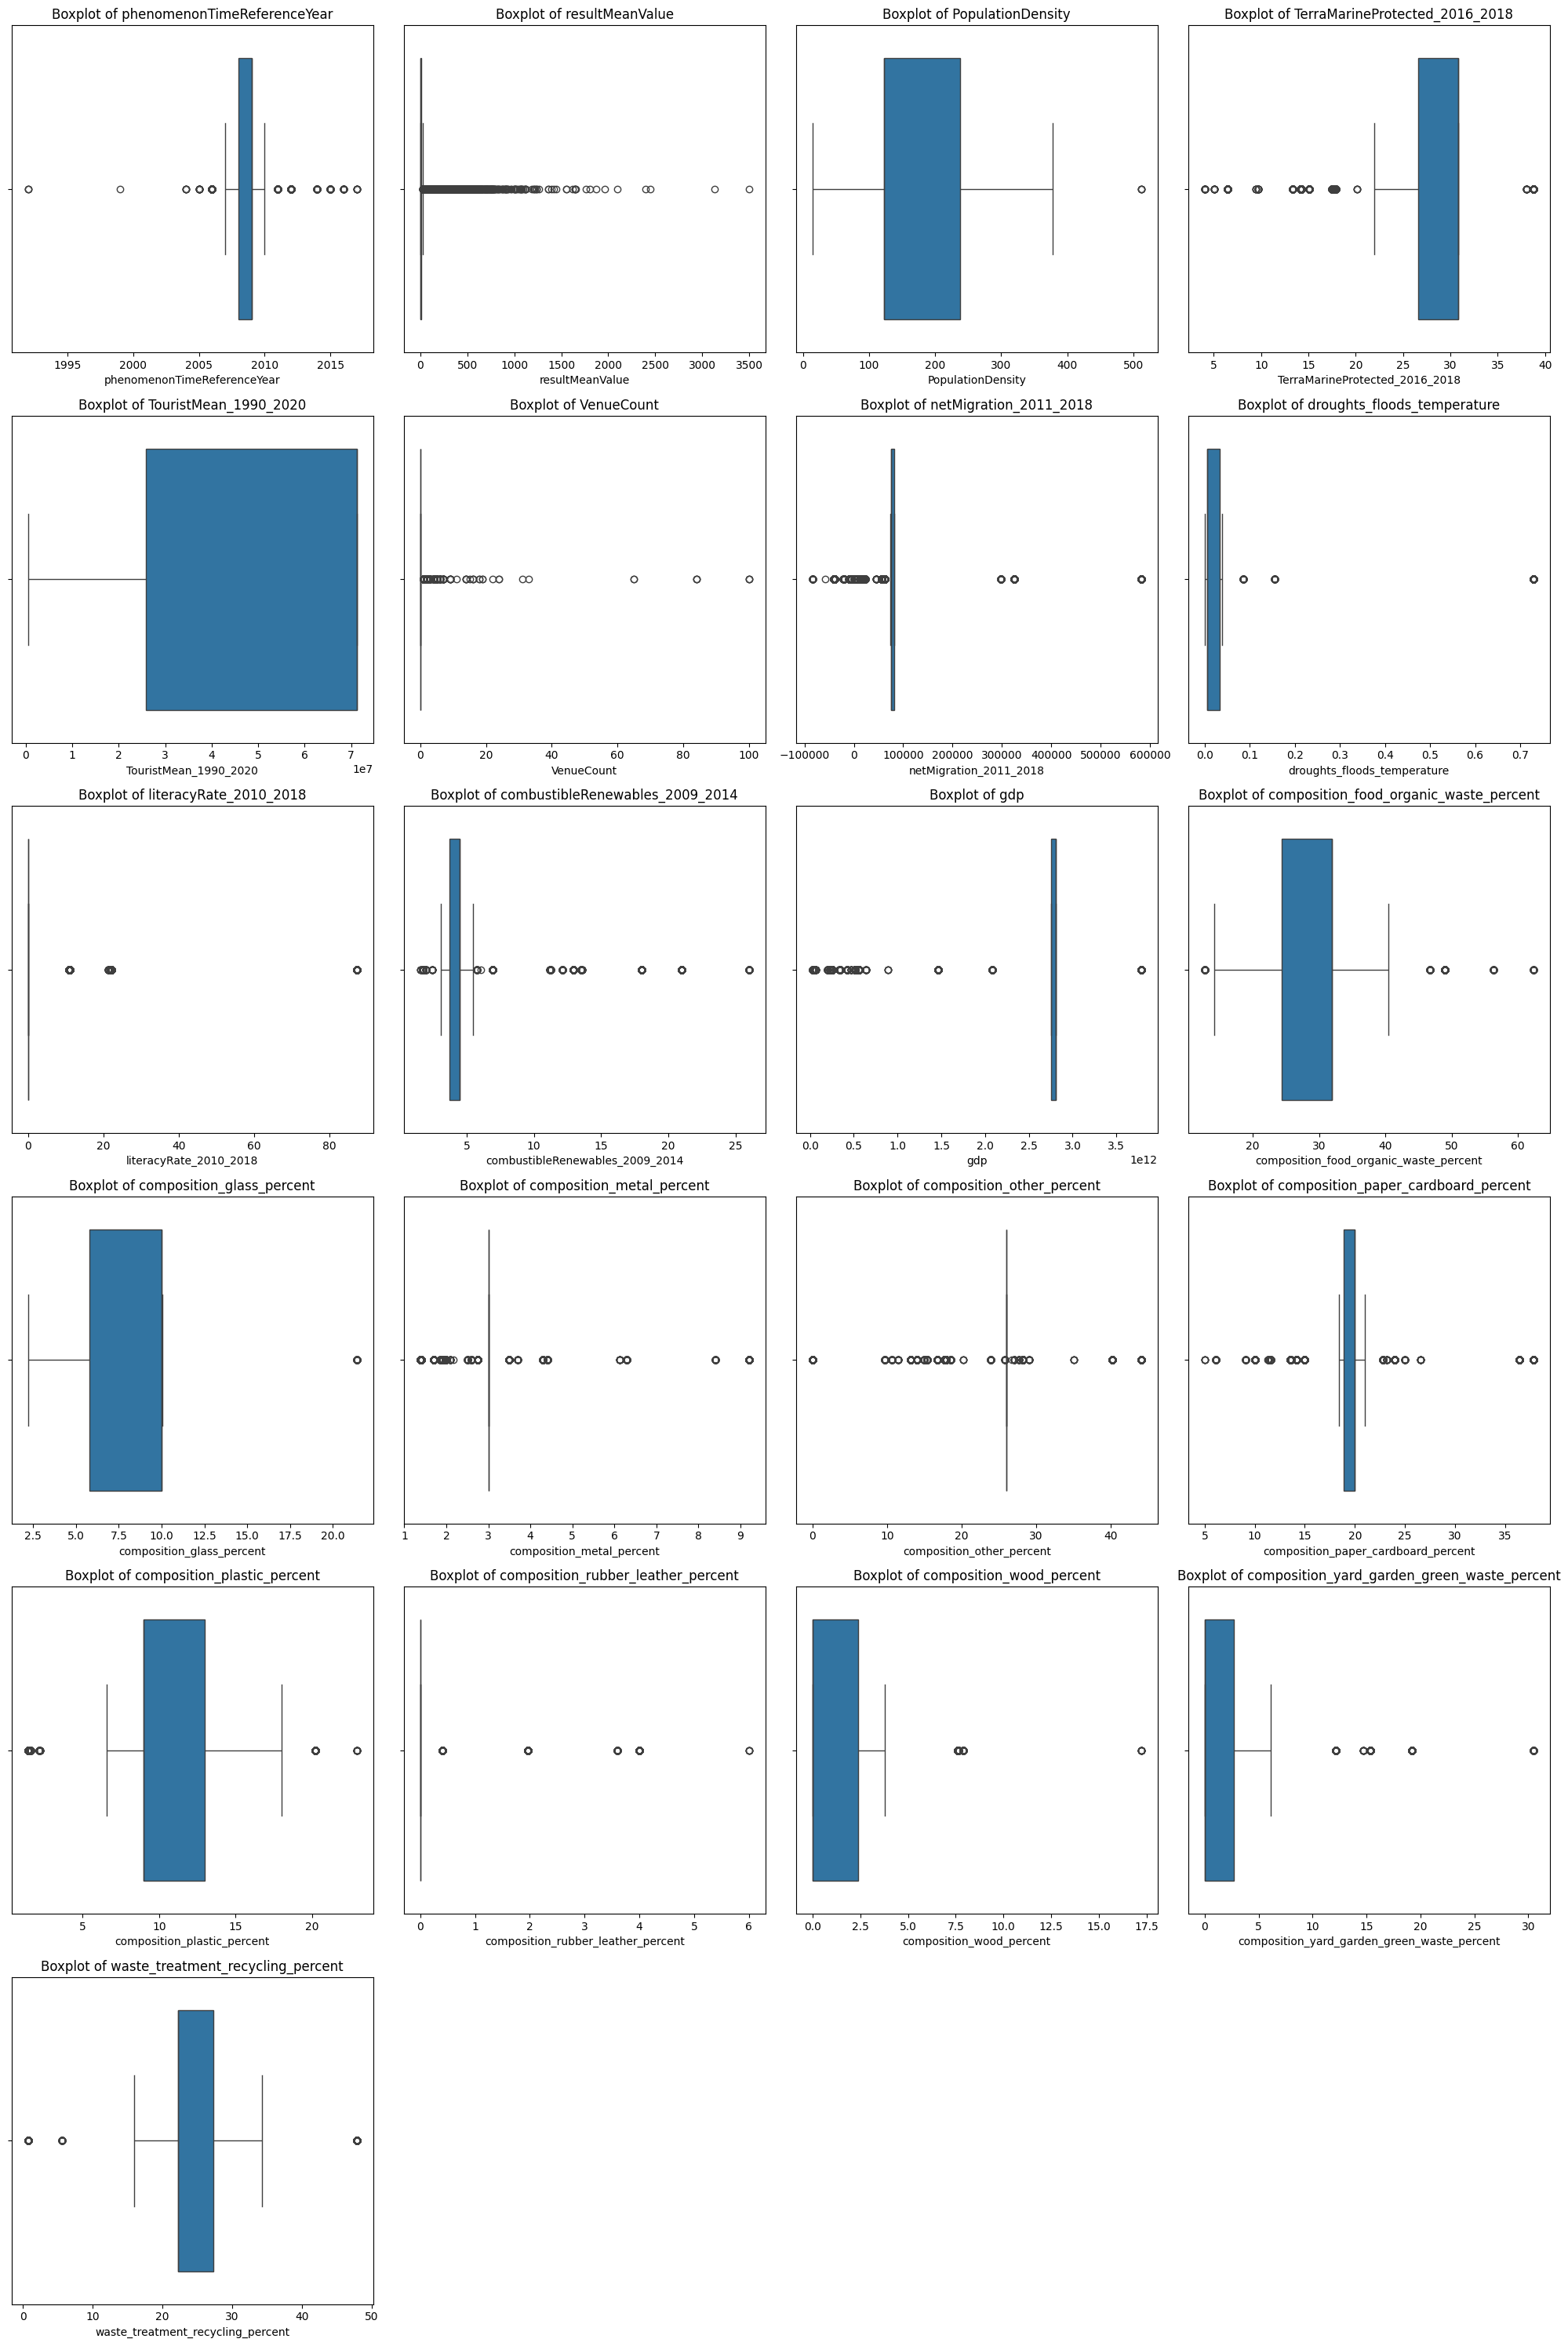

In [26]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
df.dropna(subset=['Country'], inplace=True)

In [28]:
df.isna().sum()

parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
procedureAnalysedFraction                      0
procedureAnalysedMedia                         0
resultUom                                      0
phenomenonTimeReferenceYear                    0
parameterSamplingPeriod                        0
resultMeanValue                                0
waterBodyIdentifier                            0
Country                                        0
PopulationDensity                              3
TerraMarineProtected_2016_2018                 3
TouristMean_1990_2020                          3
VenueCount                                     0
netMigration_2011_2018                         3
droughts_floods_temperature                    3
literacyRate_2010_2018                         3
combustibleRenewables_2009_2014                3
gdp                                            3
composition_food_organic_waste_percent         3
composition_glass_pe

In [29]:
# Columns with NaNs that we are interested in
columns_with_nans = [
    'PopulationDensity', 'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020',
    'netMigration_2011_2018', 'droughts_floods_temperature', 'literacyRate_2010_2018',
    'combustibleRenewables_2009_2014', 'gdp', 'composition_food_organic_waste_percent',
    'composition_glass_percent', 'composition_metal_percent', 'composition_other_percent',
    'composition_paper_cardboard_percent', 'composition_plastic_percent',
    'composition_rubber_leather_percent', 'composition_wood_percent',
    'composition_yard_garden_green_waste_percent', 'waste_treatment_recycling_percent'
]

# Filter the DataFrame to show rows with missing values in the specified columns
missing_data = df[df[columns_with_nans].isna().any(axis=1)]

# Display the rows with missing data
missing_data


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
4768,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2008,2008-01--2008-12,0.044888,SKD0016,Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean
4769,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2008,2008-01--2008-12,0.055836,SKD0018,Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean
18933,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2006,2006-01--2006-12,13.561362,LT150100016,Russia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dirty


In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18367 non-null  object 
 1   observedPropertyDeterminandCode              18367 non-null  object 
 2   procedureAnalysedFraction                    18367 non-null  object 
 3   procedureAnalysedMedia                       18367 non-null  object 
 4   resultUom                                    18367 non-null  object 
 5   phenomenonTimeReferenceYear                  18367 non-null  int64  
 6   parameterSamplingPeriod                      18367 non-null  object 
 7   resultMeanValue                              18367 non-null  float64
 8   waterBodyIdentifier                          18367 non-null  object 
 9   Country                                      18367 non-null  object 
 10  Pop

In [32]:
# Replace 'clean' with 1 and 'dirty' with 0
df['water_quality'] = df['water_quality'].replace({'clean': 0, 'dirty': 1})

df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
5,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,2.477792,ES014MSPFES-014-NR-038-000-02-02,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0


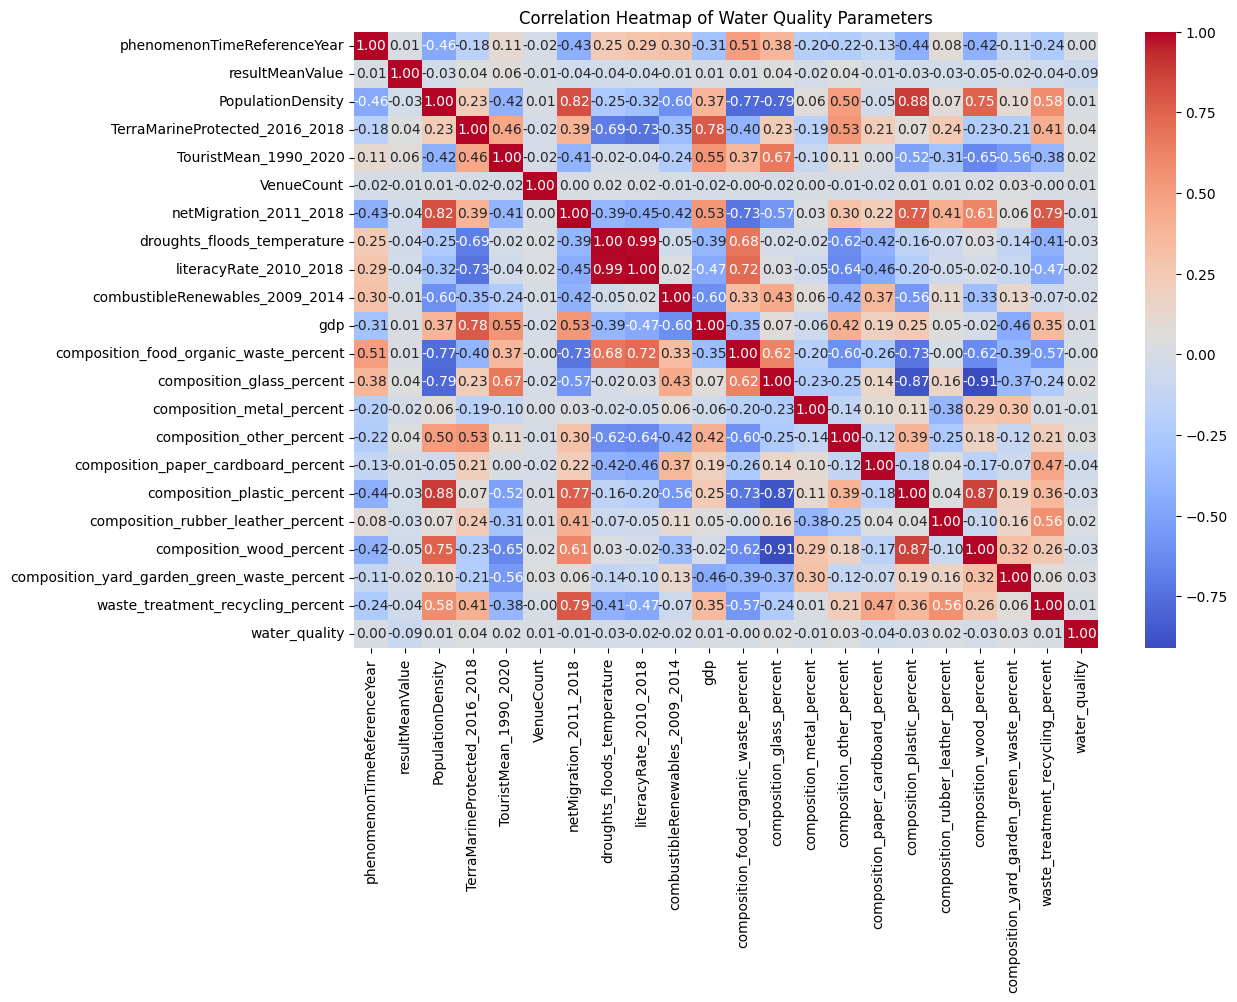

In [33]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_cols]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

# Feature Selection

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18367 non-null  object 
 1   observedPropertyDeterminandCode              18367 non-null  object 
 2   procedureAnalysedFraction                    18367 non-null  object 
 3   procedureAnalysedMedia                       18367 non-null  object 
 4   resultUom                                    18367 non-null  object 
 5   phenomenonTimeReferenceYear                  18367 non-null  int64  
 6   parameterSamplingPeriod                      18367 non-null  object 
 7   resultMeanValue                              18367 non-null  float64
 8   waterBodyIdentifier                          18367 non-null  object 
 9   Country                                      18367 non-null  object 
 10  Pop

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Initialize the model
model = KNeighborsClassifier()

# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"].values
x = data.drop(["water_quality"], axis=1)

# Function to fit data, train model, and return score
def fitData(x, y, model, usedCols):
    x_train, x_test, y_train, y_test = train_test_split(x[usedCols], y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

scores = []
usedCols = []

# Iterate through each feature
for col in x.columns:
    usedCols.append(col)
    score = fitData(x, y, model, usedCols)
    scores.append(score)
    # print(f"Accuracy with {col} Feature: {score}")
    # print("-" * 65)

# Optionally, you can print the sorted scores with corresponding feature names
sorted_scores = sorted(zip(scores, x.columns), reverse=True)
print("\nFeature Scores:")
for score, col in sorted_scores:
    print(f"Accuracy with {col} Feature: {score}")


Feature Scores:
Accuracy with resultMeanValue Feature: 0.9860279441117764
Accuracy with waterBodyIdentifier Feature: 0.8662674650698603
Accuracy with Country Feature: 0.8660860097985846
Accuracy with TouristMean_1990_2020 Feature: 0.862456904373072
Accuracy with PopulationDensity Feature: 0.8622754491017964
Accuracy with TerraMarineProtected_2016_2018 Feature: 0.8619125385592451
Accuracy with netMigration_2011_2018 Feature: 0.8617310832879695
Accuracy with VenueCount Feature: 0.8617310832879695
Accuracy with literacyRate_2010_2018 Feature: 0.8602794411177644
Accuracy with droughts_floods_temperature Feature: 0.8602794411177644
Accuracy with combustibleRenewables_2009_2014 Feature: 0.8602794411177644
Accuracy with procedureAnalysedMedia Feature: 0.8180003629105426
Accuracy with procedureAnalysedFraction Feature: 0.8180003629105426
Accuracy with observedPropertyDeterminandCode Feature: 0.8180003629105426
Accuracy with parameterSamplingPeriod Feature: 0.7976773725276719
Accuracy with phe

In [36]:
df_train = df.loc[:, ['resultMeanValue', 'waterBodyIdentifier', 'Country', 'TouristMean_1990_2020', 'PopulationDensity',
                      'TerraMarineProtected_2016_2018', 'netMigration_2011_2018', 'VenueCount', 'literacyRate_2010_2018',
                      'droughts_floods_temperature', 'combustibleRenewables_2009_2014', 'resultUom', 'procedureAnalysedMedia',
                      'procedureAnalysedFraction', 'observedPropertyDeterminandCode', 'parameterSamplingPeriod', 'phenomenonTimeReferenceYear', 'water_quality']]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   resultMeanValue                  18367 non-null  float64
 1   waterBodyIdentifier              18367 non-null  object 
 2   Country                          18367 non-null  object 
 3   TouristMean_1990_2020            18367 non-null  float64
 4   PopulationDensity                18367 non-null  float64
 5   TerraMarineProtected_2016_2018   18367 non-null  float64
 6   netMigration_2011_2018           18367 non-null  float64
 7   VenueCount                       18367 non-null  float64
 8   literacyRate_2010_2018           18367 non-null  float64
 9   droughts_floods_temperature      18367 non-null  float64
 10  combustibleRenewables_2009_2014  18367 non-null  float64
 11  resultUom                        18367 non-null  object 
 12  procedureAnalysedMedia 

# Preprocessing Data


## Oversampling for imbalance target class

In [37]:
! pip install -q imbalanced-learn

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Check the balance of the classes after applying SMOTE
print("\nResampled class distribution:\n", pd.Series(y).value_counts())

# Optional: Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X, columns=X.columns)
df_resampled['water_quality'] = y

print("\nResampled DataFrame:")
df_resampled.head()

Original class distribution:
 water_quality
0    12789
1     5578
Name: count, dtype: int64

Resampled class distribution:
 water_quality
0    12789
1    12789
Name: count, dtype: int64

Resampled DataFrame:


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,2,2,1,0,8,2009,12,0.063310,1227,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,2,2,1,0,8,2009,12,0.046733,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,2,24,1,0,17,2009,12,132.859000,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,2,1,1,0,9,2009,12,11.578376,1439,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
4,2,1,1,0,9,2009,12,2.477792,311,21,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0


In [40]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.06880409, -1.21153442,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       [ 0.06880409, -1.21153442,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       [ 0.06880409,  1.74442129,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       ...,
       [ 0.06880409,  1.2069748 ,  0.0139828 , ...,  1.79546697,
         0.31160078,  0.61534876],
       [ 0.06880409, -1.07717279,  0.0139828 , ...,  0.12972389,
         4.4215811 , -0.77432214],
       [ 0.06880409, -0.27100305,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924]])

# Model Training


In [41]:
from sklearn.model_selection import train_test_split
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Skenario : Dengan Oversampling

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [43]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9159499609069586

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2577
           1       0.92      0.91      0.91      2539

    accuracy                           0.92      5116
   macro avg       0.92      0.92      0.92      5116
weighted avg       0.92      0.92      0.92      5116



In [44]:
import h5py
import numpy as np

# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_oversampling.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9941360437842064

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2577
           1       0.99      0.99      0.99      2539

    accuracy                           0.99      5116
   macro avg       0.99      0.99      0.99      5116
weighted avg       0.99      0.99      0.99      5116



In [46]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_oversampling.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9927677873338546

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2577
           1       0.99      0.99      0.99      2539

    accuracy                           0.99      5116
   macro avg       0.99      0.99      0.99      5116
weighted avg       0.99      0.99      0.99      5116



In [48]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_oversampling.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [49]:
from xgboost import XGBClassifier
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9943315089913995

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2577
           1       0.99      0.99      0.99      2539

    accuracy                           0.99      5116
   macro avg       0.99      0.99      0.99      5116
weighted avg       0.99      0.99      0.99      5116



In [50]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_oversampling.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

In [53]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,393 (357.00 KB)

 Trainable params: 91,393 (357.00 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7424 - loss: 0.5201 - val_accuracy: 0.8649 - val_loss: 0.3326
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8417 - loss: 0.3498 - val_accuracy: 0.8852 - val_loss: 0.2975
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8649 - loss: 0.3025 - val_accuracy: 0.8832 - val_loss: 0.2695
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8783 - loss: 0.2706 - val_accuracy: 0.8786 - val_loss: 0.2776
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8822 - loss: 0.2683 - val_accuracy: 0.8786 - val_loss: 0.2672
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8914 - loss: 0.2500 - val_accuracy: 0.8915 - val_loss: 0.2400
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8949 - loss: 0.2403 - val_accuracy: 0.9050 - val_loss: 0.2247
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8979 - loss: 0.2352 - val_accu

In [56]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9315871774824082


In [58]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2577
           1       0.94      0.92      0.93      2539

    accuracy                           0.93      5116
   macro avg       0.93      0.93      0.93      5116
weighted avg       0.93      0.93      0.93      5116



In [59]:
from tensorflow.keras.models import Sequential

# Assuming `model` is your trained Keras model
ann_model.save('ann_oversampling.h5')

## Skenario : Baseline

In [60]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
print("Original class distribution:\n", y.value_counts())

Original class distribution:
 water_quality
0    12789
1     5578
Name: count, dtype: int64


In [61]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.61225247,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       ...,
       [ 0.07119515, -1.24095898,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.73630514,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  0.49577842,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345]])

In [62]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [63]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8941208492106696

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2554
           1       0.86      0.78      0.82      1120

    accuracy                           0.89      3674
   macro avg       0.88      0.86      0.87      3674
weighted avg       0.89      0.89      0.89      3674



In [64]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_baseline.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [65]:
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989112683723462

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [66]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_baseline.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [67]:
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9923788786064235

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2554
           1       0.99      0.98      0.99      1120

    accuracy                           0.99      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       0.99      0.99      0.99      3674



In [68]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_baseline.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [69]:
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.997550353837779

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [70]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_baseline.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [71]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7417 - loss: 0.5248 - val_accuracy: 0.8057 - val_loss: 0.3968
Epoch 2/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8356 - loss: 0.3624 - val_accuracy: 0.8346 - val_loss: 0.3511
Epoch 3/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8469 - loss: 0.3378 - val_accuracy: 0.8622 - val_loss: 0.3166
Epoch 4/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8559 - loss: 0.3171 - val_accuracy: 0.8510 - val_loss: 0.3376
Epoch 5/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8718 - loss: 0.2934 - val_accuracy: 0.8482 - val_loss: 0.3120
Epoch 6/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8825 - loss: 0.2807 - val_accuracy: 0.8636 - val_loss: 0.2977
Epoch 7/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8793 - loss: 0.2761 - val_accuracy: 0.8714 - val_loss: 0.3106
Epoch 8/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8818 - loss: 0.2721 - val_accu

In [72]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Accuracy: 0.9148067501360915

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2554
           1       0.90      0.81      0.85      1120

    accuracy                           0.91      3674
   macro avg       0.91      0.88      0.90      3674
weighted avg       0.91      0.91      0.91      3674



In [73]:
# Assuming `model` is your trained Keras model
ann_model.save('ann_baseline.h5')

## Skenario : Dengan Feature Selection

In [74]:
data = df.loc[:, ['resultMeanValue', 'waterBodyIdentifier', 'Country', 'TouristMean_1990_2020', 'PopulationDensity',
                      'TerraMarineProtected_2016_2018', 'netMigration_2011_2018', 'VenueCount', 'literacyRate_2010_2018',
                      'droughts_floods_temperature', 'combustibleRenewables_2009_2014', 'resultUom', 'procedureAnalysedMedia',
                      'procedureAnalysedFraction', 'observedPropertyDeterminandCode', 'parameterSamplingPeriod', 'phenomenonTimeReferenceYear', 'water_quality']]

# List of categorical columns to encode
columns_to_encode = ["observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
data

,resultMeanValue,waterBodyIdentifier,Country,TouristMean_1990_2020,PopulationDensity,TerraMarineProtected_2016_2018,netMigration_2011_2018,VenueCount,literacyRate_2010_2018,droughts_floods_temperature,combustibleRenewables_2009_2014,resultUom,procedureAnalysedMedia,procedureAnalysedFraction,observedPropertyDeterminandCode,parameterSamplingPeriod,phenomenonTimeReferenceYear,water_quality
0,0.063310,1227,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
1,0.046733,1385,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
2,132.859000,1385,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,17,0,1,24,12,2009,0
3,11.578376,1439,8,71176346.0,122.299437,30.831906,75808.375,2.0,0.000000,0.005718,4.457840,9,0,1,1,12,2009,1
5,2.477792,311,21,50941692.0,93.677197,15.047884,-40055.250,4.0,87.158924,0.729194,4.363288,9,0,1,1,12,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.092466,1935,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
19996,89.908300,1935,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,0,0,1,7,12,2009,1
19997,18.901608,1937,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,9,0,1,1,12,2009,1
19998,307.307000,1937,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,17,0,1,25,12,2009,0


In [75]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.29040809, -0.30943874, -0.71087809, ..., -1.11690631,
         0.33212422,  0.30256165],
       [-0.29054645, -0.09584684, -0.71087809, ..., -1.11690631,
         0.33212422,  0.30256165],
       [ 0.81796726, -0.09584684, -0.71087809, ...,  1.61225247,
         0.33212422,  0.30256165],
       ...,
       [-0.13317479,  0.65037294, -0.71087809, ..., -1.24095898,
         0.33212422,  0.30256165],
       [ 2.27399241,  0.65037294, -0.71087809, ...,  1.73630514,
         0.33212422,  0.30256165],
       [-0.22454208,  0.65037294, -0.71087809, ...,  0.49577842,
         0.33212422,  0.30256165]])

In [76]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [77]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8952095808383234

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2554
           1       0.86      0.78      0.82      1120

    accuracy                           0.90      3674
   macro avg       0.89      0.86      0.87      3674
weighted avg       0.89      0.90      0.89      3674



In [78]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [79]:
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9991834512792597

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [80]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [81]:
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.995100707675558

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      0.99      0.99      1120

    accuracy                           1.00      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       1.00      1.00      1.00      3674



In [82]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [83]:
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9972781709308656

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [84]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [85]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7403 - loss: 0.5183 - val_accuracy: 0.8285 - val_loss: 0.3677
Epoch 2/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8495 - loss: 0.3409 - val_accuracy: 0.8462 - val_loss: 0.3367
Epoch 3/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3194 - val_accuracy: 0.8438 - val_loss: 0.3352
Epoch 4/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8603 - loss: 0.3068 - val_accuracy: 0.8656 - val_loss: 0.3028
Epoch 5/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8782 - loss: 0.2820 - val_accuracy: 0.8717 - val_loss: 0.2937
Epoch 6/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.2694 - val_accuracy: 0.8867 - val_loss: 0.2828
Epoch 7/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8877 - loss: 0.2605 - val_accuracy: 0.8724 - val_loss: 0.2844
Epoch 8/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8887 - loss: 0.2553 - val_accu

In [86]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Accuracy: 0.916984213391399

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2554
           1       0.88      0.85      0.86      1120

    accuracy                           0.92      3674
   macro avg       0.91      0.90      0.90      3674
weighted avg       0.92      0.92      0.92      3674



In [87]:
# Assuming `model` is your trained Keras model
ann_model.save('ann_feature_selection.h5')

## Skenario : Dengan Hyperparameter Tuning

In [88]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
data

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,2,2,1,0,8,2009,12,0.063310,1227,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,2,2,1,0,8,2009,12,0.046733,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,2,24,1,0,17,2009,12,132.859000,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,2,1,1,0,9,2009,12,11.578376,1439,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
5,2,1,1,0,9,2009,12,2.477792,311,21,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,1,0,8,2009,12,0.092466,1935,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
19996,2,7,1,0,0,2009,12,89.908300,1935,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
19997,2,1,1,0,9,2009,12,18.901608,1937,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
19998,2,25,1,0,17,2009,12,307.307000,1937,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0


In [89]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.61225247,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       ...,
       [ 0.07119515, -1.24095898,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.73630514,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  0.49577842,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345]])

In [90]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
! pip install -q optuna

### KNN

In [92]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)

    # Train KNN model with suggested hyperparameters
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final KNN model with the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[I 2025-06-13 17:26:31,599] A new study created in memory with name: no-name-c2fa73ad-d427-46ae-9d01-0127d70113d3
[I 2025-06-13 17:26:31,825] Trial 0 finished with value: 0.9074578116494284 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.9074578116494284.
[I 2025-06-13 17:26:32,263] Trial 1 finished with value: 0.9123571039738705 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9123571039738705.
[I 2025-06-13 17:26:32,352] Trial 2 finished with value: 0.9118127381600436 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9123571039738705.
[I 2025-06-13 17:26:32,803] Trial 3 finished with value: 0.9066412629286881 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9123571039738705.
[I 2025-06-13 17:26:33,102] Trial 4 finished with value: 0.9031028851388133 and parameters: {'n_neighbors': 3, 'weights':

Best hyperparameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 1}

Accuracy: 0.9158954817637452

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2554
           1       0.90      0.82      0.86      1120

    accuracy                           0.92      3674
   macro avg       0.91      0.89      0.90      3674
weighted avg       0.92      0.92      0.91      3674



In [93]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [94]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Train Decision Tree model with suggested hyperparameters
    decision_tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    decision_tree.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final Decision Tree model with the best hyperparameters
decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2025-06-13 17:26:57,721] A new study created in memory with name: no-name-0bb2bf44-1c6e-43f0-ab6b-08fbe0695b99
[I 2025-06-13 17:26:57,778] Trial 0 finished with value: 0.997550353837779 and parameters: {'max_depth': 31, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.997550353837779.
[I 2025-06-13 17:26:57,824] Trial 1 finished with value: 0.9980947196516059 and parameters: {'max_depth': 21, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9980947196516059.
[I 2025-06-13 17:26:57,865] Trial 2 finished with value: 0.9934676102340773 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9980947196516059.
[I 2025-06-13 17:26:57,905] Trial 3 finished with value: 0.9964616222101252 and parameters: {'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.9980947196516059.
[I 2025-06-13 17:26:57,941] Trial 4 finished with value: 0.9

Best hyperparameters: {'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1}

Accuracy: 0.9991834512792597

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [95]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_hyperaparamater_tuning.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [96]:
from joblib import Parallel, delayed
import multiprocessing

In [97]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Train Random Forest model with suggested hyperparameters
    random_forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    random_forest.fit(X_train, y_train)

    # Predict on the test set
    y_pred = random_forest.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study
study = optuna.create_study(direction='maximize')

# Optimize the study with parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Use Optuna's built-in parallel execution
study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final Random Forest model with the best hyperparameters
random_forest = RandomForestClassifier(**best_params, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2025-06-13 17:27:03,627] A new study created in memory with name: no-name-5b0f6094-5acd-4afc-916f-130594f478fa
[I 2025-06-13 17:27:06,663] Trial 8 finished with value: 0.9648884050081655 and parameters: {'n_estimators': 77, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 8 with value: 0.9648884050081655.
[I 2025-06-13 17:27:08,593] Trial 4 finished with value: 0.9637996733805118 and parameters: {'n_estimators': 132, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 'log2'}. Best is trial 8 with value: 0.9648884050081655.
[I 2025-06-13 17:27:08,931] Trial 1 finished with value: 0.9205225911812738 and parameters: {'n_estimators': 158, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.9648884050081655.
[I 2025-06-13 17:27:09,032] Trial 10 finished with value: 0.7357103973870441 and parameters: {'n_estimators': 193, 'max_depth': 4

Best hyperparameters: {'n_estimators': 62, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Accuracy: 0.9923788786064235

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2554
           1       0.99      0.98      0.99      1120

    accuracy                           0.99      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       0.99      0.99      0.99      3674



In [98]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [99]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,  # For the iris dataset
        'eval_metric': 'mlogloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True)
    }

    # Train XGBoost model with suggested hyperparameters
    xgboost_model = XGBClassifier(**param, random_state=42)
    xgboost_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')

# Optimize the study with parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Use Optuna's built-in parallel execution
study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final XGBoost model with the best hyperparameters
xgboost_model = XGBClassifier(**best_params, random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2025-06-13 17:27:47,130] A new study created in memory with name: no-name-ff47f708-cf75-4ac7-9408-dace181e2c00
[I 2025-06-13 17:27:53,206] Trial 1 finished with value: 0.995100707675558 and parameters: {'max_depth': 7, 'learning_rate': 0.24787858353953404, 'n_estimators': 370, 'gamma': 4.629723095799805, 'min_child_weight': 8, 'subsample': 0.8258257261960965, 'colsample_bytree': 0.9429793833489502, 'lambda': 5.273509824302092e-06, 'alpha': 0.008480255887753507}. Best is trial 1 with value: 0.995100707675558.
[I 2025-06-13 17:27:53,593] Trial 10 finished with value: 0.9953728905824715 and parameters: {'max_depth': 7, 'learning_rate': 0.07661898069269726, 'n_estimators': 202, 'gamma': 1.9439472781540053, 'min_child_weight': 3, 'subsample': 0.5946606798873373, 'colsample_bytree': 0.5731038839920211, 'lambda': 1.1050661073368684e-07, 'alpha': 7.906930296230155e-08}. Best is trial 10 with value: 0.9953728905824715.
[I 2025-06-13 17:27:54,900] Trial 11 finished with value: 0.9978225367446

Best hyperparameters: {'max_depth': 4, 'learning_rate': 0.25277900068902154, 'n_estimators': 185, 'gamma': 0.43499107309449203, 'min_child_weight': 2, 'subsample': 0.8356110306734124, 'colsample_bytree': 0.9586307981503993, 'lambda': 0.09235492813225683, 'alpha': 0.00027896384881216906}

Accuracy: 0.997550353837779

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [100]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [101]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import optuna
import multiprocessing
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import classification_report

# Add these imports for data preprocessing and splitting (if not already defined elsewhere in your code)
from sklearn.model_selection import train_test_split

In [ ]:
# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 3)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    num_epochs = trial.suggest_int('num_epochs', 10, 100)

    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(n_layers):
        num_hidden = trial.suggest_int(f'n_units_l{i}', 4, 128)
        model.add(layers.Dense(num_hidden, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=getattr(keras.optimizers, optimizer)(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Evaluate the model
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize with parallel execution
study = optuna.create_study(direction='maximize')

# Use Optuna's built-in parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Ensure that the main study optimization is run within the "__name__ == '__main__'" block
if __name__ == "__main__":
    study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

    # Get the best hyperparameters
    best_params = study.best_params
    print("Best hyperparameters:", best_params)

    # Train the final model with the best hyperparameters
    n_layers = best_params['n_layers']
    activation = best_params['activation']
    optimizer = best_params['optimizer']
    learning_rate = best_params['learning_rate']
    dropout_rate = best_params['dropout_rate']
    batch_size = best_params['batch_size']
    num_epochs = best_params['num_epochs']

    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(n_layers):
        num_hidden = best_params[f'n_units_l{i}']
        model.add(layers.Dense(num_hidden, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=getattr(keras.optimizers, optimizer)(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Evaluate the final model
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)

    # Optional: Print classification report
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

[I 2025-06-13 17:28:55,996] A new study created in memory with name: no-name-3424f6ba-49fe-4d58-a161-9b387a915222


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:30:25,486] Trial 6 finished with value: 0.87915078933043 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.009349690267690338, 'dropout_rate': 0.09000777860012138, 'batch_size': 71, 'num_epochs': 22, 'n_units_l0': 91, 'n_units_l1': 92, 'n_units_l2': 124}. Best is trial 6 with value: 0.87915078933043.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:30:47,725] Trial 10 finished with value: 0.8807838867719108 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.05077829065891646, 'dropout_rate': 0.3085179856424638, 'batch_size': 99, 'num_epochs': 40, 'n_units_l0': 16, 'n_units_l1': 119, 'n_units_l2': 121}. Best is trial 10 with value: 0.8807838867719108.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


[I 2025-06-13 17:31:04,858] Trial 4 finished with value: 0.6927054980947196 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 7.022121046149668e-05, 'dropout_rate': 0.15672927231887246, 'batch_size': 106, 'num_epochs': 52, 'n_units_l0': 71}. Best is trial 10 with value: 0.8807838867719108.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:31:26,396] Trial 11 finished with value: 0.8772455089820359 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.04007769781530214, 'dropout_rate': 0.002589997028305757, 'batch_size': 121, 'num_epochs': 68, 'n_units_l0': 61}. Best is trial 10 with value: 0.8807838867719108.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:31:55,271] Trial 1 finished with value: 0.8829613500272183 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.034487650451215775, 'dropout_rate': 0.30093799158679063, 'batch_size': 115, 'num_epochs': 79, 'n_units_l0': 122}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:32:11,819] Trial 13 finished with value: 0.6951551442569407 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 6.683873682042428e-05, 'dropout_rate': 0.2810473360629222, 'batch_size': 124, 'num_epochs': 37, 'n_units_l0': 107, 'n_units_l1': 69}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:32:31,320] Trial 9 finished with value: 0.8211758301578661 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 7.422683549822298e-05, 'dropout_rate': 0.3475510926600271, 'batch_size': 119, 'num_epochs': 95, 'n_units_l0': 75, 'n_units_l1': 108, 'n_units_l2': 20}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:32:49,009] Trial 14 finished with value: 0.8731627653783343 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.000871440947963126, 'dropout_rate': 0.4204538885479342, 'batch_size': 116, 'num_epochs': 43, 'n_units_l0': 36, 'n_units_l1': 18}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:32:56,184] Trial 8 finished with value: 0.706314643440392 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.00010115349276031374, 'dropout_rate': 0.07709299455090363, 'batch_size': 69, 'num_epochs': 67, 'n_units_l0': 66, 'n_units_l1': 6}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:33:28,401] Trial 18 finished with value: 0.8170930865541643 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.00020859808974096317, 'dropout_rate': 0.10177093177663893, 'batch_size': 114, 'num_epochs': 21, 'n_units_l0': 81, 'n_units_l1': 55}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:33:34,866] Trial 0 finished with value: 0.6951551442569407 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.07900377195291954, 'dropout_rate': 0.27709769337834017, 'batch_size': 87, 'num_epochs': 96, 'n_units_l0': 26, 'n_units_l1': 18, 'n_units_l2': 59}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:33:48,133] Trial 12 finished with value: 0.7661948829613501 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0005079555501283592, 'dropout_rate': 0.3870940002746206, 'batch_size': 123, 'num_epochs': 97, 'n_units_l0': 102}. Best is trial 1 with value: 0.8829613500272183.
[I 2025-06-13 17:33:48,695] Trial 15 finished with value: 0.6951551442569407 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0001341785838961744, 'dropout_rate': 0.3923608246158656, 'batch_size': 114, 'num_epochs': 60, 'n_units_l0': 11, 'n_units_l1': 84}. Best is trial 1 with value: 0.8829613500272183.


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


[I 2025-06-13 17:34:30,955] Trial 7 finished with value: 0.896842678279804 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.006974261775648433, 'dropout_rate': 0.01343258266672015, 'batch_size': 44, 'num_epochs': 62, 'n_units_l0': 63, 'n_units_l1': 19, 'n_units_l2': 80}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:34:37,388] Trial 5 finished with value: 0.6951551442569407 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.042613635986665024, 'dropout_rate': 0.09502969717254417, 'batch_size': 63, 'num_epochs': 87, 'n_units_l0': 122, 'n_units_l1': 120, 'n_units_l2': 120}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 17:34:46,547] Trial 17 finished with value: 0.856559608056614 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.06671222202332483, 'dropout_rate': 0.19854520851955904, 'batch_size': 126, 'num_epochs': 71, 'n_units_l0': 52}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:36:24,635] Trial 3 finished with value: 0.8023952095808383 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.08832020981859418, 'dropout_rate': 0.42062941590413394, 'batch_size': 49, 'num_epochs': 95, 'n_units_l0': 103}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 17:36:35,631] Trial 2 finished with value: 0.7751769188894937 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0002132998043061186, 'dropout_rate': 0.006998005357437109, 'batch_size': 46, 'num_epochs': 91, 'n_units_l0': 72}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:37:19,324] Trial 16 finished with value: 0.8962983124659771 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0014436162815213015, 'dropout_rate': 0.0994917418732868, 'batch_size': 48, 'num_epochs': 65, 'n_units_l0': 127, 'n_units_l1': 125}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


[I 2025-06-13 17:40:59,220] Trial 19 finished with value: 0.6967882416984214 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.01969203345707574, 'dropout_rate': 0.2698604633407873, 'batch_size': 22, 'num_epochs': 46, 'n_units_l0': 127, 'n_units_l1': 35, 'n_units_l2': 71}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


[I 2025-06-13 17:41:30,086] Trial 23 finished with value: 0.87915078933043 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.004523721843552483, 'dropout_rate': 0.49449243468021364, 'batch_size': 39, 'num_epochs': 74, 'n_units_l0': 127, 'n_units_l1': 121, 'n_units_l2': 127}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:42:02,719] Trial 21 finished with value: 0.6946107784431138 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 1.0418285058314206e-05, 'dropout_rate': 0.4812021866298225, 'batch_size': 46, 'num_epochs': 97, 'n_units_l0': 124}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:42:47,078] Trial 26 finished with value: 0.8788786064235166 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005028724358531544, 'dropout_rate': 0.19492162079974848, 'batch_size': 38, 'num_epochs': 79, 'n_units_l0': 48}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:42:52,934] Trial 24 finished with value: 0.8772455089820359 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.004571869076981961, 'dropout_rate': 0.4990266247401627, 'batch_size': 35, 'num_epochs': 79, 'n_units_l0': 128, 'n_units_l1': 124, 'n_units_l2': 120}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:43:23,872] Trial 27 finished with value: 0.8723462166575939 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005085672945238662, 'dropout_rate': 0.21374177261149224, 'batch_size': 36, 'num_epochs': 79, 'n_units_l0': 48}. Best is trial 7 with value: 0.896842678279804.
[I 2025-06-13 17:43:25,035] Trial 22 finished with value: 0.8562874251497006 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.009103845890844675, 'dropout_rate': 0.4844386146092665, 'batch_size': 31, 'num_epochs': 79, 'n_units_l0': 128}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 17:43:32,324] Trial 25 finished with value: 0.8671747414262384 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.005894295673033504, 'dropout_rate': 0.4899983832618723, 'batch_size': 34, 'num_epochs': 79, 'n_units_l0': 122}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:43:53,261] Trial 20 finished with value: 0.8726183995645074 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.006533975036531101, 'dropout_rate': 0.2876688548733025, 'batch_size': 25, 'num_epochs': 72, 'n_units_l0': 85}. Best is trial 7 with value: 0.896842678279804.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


[I 2025-06-13 17:47:27,795] Trial 35 finished with value: 0.9014697876973327 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0022692725758286804, 'dropout_rate': 0.0393595455944407, 'batch_size': 59, 'num_epochs': 59, 'n_units_l0': 112, 'n_units_l1': 46}. Best is trial 35 with value: 0.9014697876973327.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


[I 2025-06-13 17:48:03,384] Trial 37 finished with value: 0.8826891671203049 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.001961285908272102, 'dropout_rate': 0.03639160191799773, 'batch_size': 59, 'num_epochs': 58, 'n_units_l0': 113, 'n_units_l1': 43}. Best is trial 35 with value: 0.9014697876973327.


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


[I 2025-06-13 17:48:27,029] Trial 38 finished with value: 0.889493739793141 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0020451592369489366, 'dropout_rate': 0.049214099292126744, 'batch_size': 56, 'num_epochs': 59, 'n_units_l0': 111, 'n_units_l1': 50}. Best is trial 35 with value: 0.9014697876973327.
[I 2025-06-13 17:48:27,786] Trial 36 finished with value: 0.8984757757212847 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0017580405193965195, 'dropout_rate': 0.062066495792519494, 'batch_size': 59, 'num_epochs': 63, 'n_units_l0': 113, 'n_units_l1': 51}. Best is trial 35 with value: 0.9014697876973327.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


[I 2025-06-13 17:48:53,066] Trial 39 finished with value: 0.9063690800217746 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.002171354753344439, 'dropout_rate': 0.04329095200780033, 'batch_size': 57, 'num_epochs': 61, 'n_units_l0': 114, 'n_units_l1': 46}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-06-13 17:49:18,064] Trial 28 finished with value: 0.8908546543277083 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.005663360089848765, 'dropout_rate': 0.21532998172979922, 'batch_size': 25, 'num_epochs': 79, 'n_units_l0': 44, 'n_units_l1': 44}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:49:44,839] Trial 41 finished with value: 0.8796951551442569 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0014908606825370851, 'dropout_rate': 0.13076990812619163, 'batch_size': 84, 'num_epochs': 32, 'n_units_l0': 93, 'n_units_l1': 36}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:50:09,503] Trial 30 finished with value: 0.8941208492106696 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.003691243268847297, 'dropout_rate': 0.19355543596560612, 'batch_size': 17, 'num_epochs': 54, 'n_units_l0': 44, 'n_units_l1': 33}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:51:01,506] Trial 43 finished with value: 0.8886771910724006 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0015419156922660351, 'dropout_rate': 0.13196316545609896, 'batch_size': 81, 'num_epochs': 51, 'n_units_l0': 96, 'n_units_l1': 66}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2025-06-13 17:51:18,035] Trial 44 finished with value: 0.88704409363092 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0006826686463950086, 'dropout_rate': 0.040741742780172126, 'batch_size': 80, 'num_epochs': 51, 'n_units_l0': 95, 'n_units_l1': 32}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:51:25,744] Trial 42 finished with value: 0.8783342406096897 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0018740074855794428, 'dropout_rate': 0.03967451482805599, 'batch_size': 81, 'num_epochs': 61, 'n_units_l0': 112, 'n_units_l1': 38}. Best is trial 39 with value: 0.9063690800217746.
[I 2025-06-13 17:51:25,752] Trial 40 finished with value: 0.8987479586281981 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0017126401846042714, 'dropout_rate': 0.04966075347946043, 'batch_size': 58, 'num_epochs': 58, 'n_units_l0': 113, 'n_units_l1': 44}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:51:36,081] Trial 45 finished with value: 0.8775176918889493 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0005373250223696829, 'dropout_rate': 0.14505704090431798, 'batch_size': 84, 'num_epochs': 51, 'n_units_l0': 94, 'n_units_l1': 30}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 17:52:07,919] Trial 46 finished with value: 0.8707131192161133 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0004886997804802912, 'dropout_rate': 0.04318662278633324, 'batch_size': 82, 'num_epochs': 49, 'n_units_l0': 98, 'n_units_l1': 62}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-06-13 17:52:18,533] Trial 32 finished with value: 0.8900381056069678 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.002949433632844299, 'dropout_rate': 0.2032545462591674, 'batch_size': 29, 'num_epochs': 80, 'n_units_l0': 115, 'n_units_l1': 47}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:52:34,838] Trial 47 finished with value: 0.8810560696788242 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0005404497339703231, 'dropout_rate': 0.04459294363527303, 'batch_size': 81, 'num_epochs': 49, 'n_units_l0': 96, 'n_units_l1': 64}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:55:27,321] Trial 48 finished with value: 0.8764289602612956 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.018918635270037756, 'dropout_rate': 0.03736125940000925, 'batch_size': 54, 'num_epochs': 64, 'n_units_l0': 111, 'n_units_l1': 63}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


[I 2025-06-13 17:55:31,147] Trial 49 finished with value: 0.8737071311921611 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.01803132157419994, 'dropout_rate': 0.06488835361196228, 'batch_size': 55, 'num_epochs': 63, 'n_units_l0': 113, 'n_units_l1': 62}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
114/115 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

[I 2025-06-13 17:55:44,117] Trial 53 finished with value: 0.8720740337506805 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.018700704286244263, 'dropout_rate': 0.06861167279000929, 'batch_size': 66, 'num_epochs': 62, 'n_units_l0': 115, 'n_units_l1': 50}. Best is trial 39 with value: 0.9063690800217746.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
 96/115 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

[I 2025-06-13 17:55:46,138] Trial 34 finished with value: 0.909635274904736 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0026502697194510437, 'dropout_rate': 0.04638728493722582, 'batch_size': 24, 'num_epochs': 82, 'n_units_l0': 113, 'n_units_l1': 49}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:55:48,688] Trial 33 finished with value: 0.9014697876973327 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0031652784554276185, 'dropout_rate': 0.20393830569777155, 'batch_size': 23, 'num_epochs': 82, 'n_units_l0': 113, 'n_units_l1': 45}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 17:56:03,791] Trial 29 finished with value: 0.8750680457267284 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005119088491254027, 'dropout_rate': 0.4979563845819086, 'batch_size': 16, 'num_epochs': 81, 'n_units_l0': 127, 'n_units_l1': 39}. Best is trial 34 with value: 0.909635274904736.
[I 2025-06-13 17:56:03,965] Trial 31 finished with value: 0.749047359825803 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 1.4111414883328402e-05, 'dropout_rate': 0.21025981947224465, 'batch_size': 20, 'num_epochs': 79, 'n_units_l0': 38, 'n_units_l1': 51}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:56:08,918] Trial 52 finished with value: 0.8671747414262384 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.022965826871872243, 'dropout_rate': 0.06626728877751893, 'batch_size': 54, 'num_epochs': 65, 'n_units_l0': 117, 'n_units_l1': 53}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2025-06-13 17:56:19,344] Trial 54 finished with value: 0.8840500816548721 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.016927535327037228, 'dropout_rate': 0.07154956762325496, 'batch_size': 65, 'num_epochs': 66, 'n_units_l0': 116, 'n_units_l1': 56, 'n_units_l2': 80}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:56:32,996] Trial 55 finished with value: 0.8462166575939031 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.023533818158083437, 'dropout_rate': 0.07470113736166156, 'batch_size': 65, 'num_epochs': 64, 'n_units_l0': 105, 'n_units_l1': 21, 'n_units_l2': 76}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:56:36,866] Trial 50 finished with value: 0.8957539466521502 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0004197921518362678, 'dropout_rate': 0.06470522505322046, 'batch_size': 65, 'num_epochs': 87, 'n_units_l0': 119, 'n_units_l1': 61}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 17:57:19,143] Trial 66 finished with value: 0.8639085465432771 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010154568694762574, 'dropout_rate': 0.013617090966945633, 'batch_size': 73, 'num_epochs': 11, 'n_units_l0': 104, 'n_units_l1': 83}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-06-13 17:57:37,764] Trial 51 finished with value: 0.864452912357104 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.017163402123401478, 'dropout_rate': 0.06596747146580792, 'batch_size': 55, 'num_epochs': 88, 'n_units_l0': 115, 'n_units_l1': 60}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 17:59:01,770] Trial 58 finished with value: 0.8982035928143712 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0028247960327126512, 'dropout_rate': 0.00020693591309396686, 'batch_size': 74, 'num_epochs': 56, 'n_units_l0': 104, 'n_units_l1': 22, 'n_units_l2': 75}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


[I 2025-06-13 17:59:13,797] Trial 57 finished with value: 0.8786064235166031 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.010820402859941132, 'dropout_rate': 0.011811873309008857, 'batch_size': 64, 'num_epochs': 56, 'n_units_l0': 103, 'n_units_l1': 14, 'n_units_l2': 81}. Best is trial 34 with value: 0.909635274904736.
[I 2025-06-13 17:59:15,327] Trial 56 finished with value: 0.8483941208492106 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.015232527098599949, 'dropout_rate': 0.0719207654098673, 'batch_size': 66, 'num_epochs': 57, 'n_units_l0': 118, 'n_units_l1': 21, 'n_units_l2': 71}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 17:59:59,584] Trial 59 finished with value: 0.9058247142079477 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.001027336994108838, 'dropout_rate': 0.010040460663511531, 'batch_size': 95, 'num_epochs': 92, 'n_units_l0': 102, 'n_units_l1': 75}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 18:00:51,073] Trial 60 finished with value: 0.8946652150244965 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0028902512543637388, 'dropout_rate': 0.014901435892319279, 'batch_size': 74, 'num_epochs': 88, 'n_units_l0': 104, 'n_units_l1': 24}. Best is trial 34 with value: 0.909635274904736.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:01:03,343] Trial 63 finished with value: 0.8979314099074578 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.002867063979300649, 'dropout_rate': 0.014066509307435276, 'batch_size': 74, 'num_epochs': 88, 'n_units_l0': 103, 'n_units_l1': 75}. Best is trial 34 with value: 0.909635274904736.
[I 2025-06-13 18:01:03,976] Trial 61 finished with value: 0.9052803483941209 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0009446866462645026, 'dropout_rate': 0.005424184900197082, 'batch_size': 74, 'num_epochs': 89, 'n_units_l0': 104, 'n_units_l1': 75}. Best is trial 34 with value: 0.909635274904736.
[I 2025-06-13 18:01:04,168] Trial 62 finished with value: 0.9101796407185628 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0030504626712860826, 'dropout_rate': 0.01683010788559569, 'batch_size': 74, 'num_epochs': 90, 'n_units_l0': 104, 'n_u

115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:01:38,413] Trial 65 finished with value: 0.8756124115405552 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00104477912473116, 'dropout_rate': 0.009730377013623448, 'batch_size': 71, 'num_epochs': 89, 'n_units_l0': 103, 'n_units_l1': 24}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 18:02:10,468] Trial 67 finished with value: 0.9044637996733805 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.002981603688665666, 'dropout_rate': 0.11370613920834802, 'batch_size': 74, 'num_epochs': 89, 'n_units_l0': 88, 'n_units_l1': 27}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:02:24,665] Trial 71 finished with value: 0.8976592270005443 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0009747279673408723, 'dropout_rate': 0.12334568839425136, 'batch_size': 95, 'num_epochs': 69, 'n_units_l0': 88, 'n_units_l1': 71}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:02:46,672] Trial 68 finished with value: 0.8837778987479586 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0032096555104470952, 'dropout_rate': 0.11244018744477387, 'batch_size': 42, 'num_epochs': 56, 'n_units_l0': 85, 'n_units_l1': 27}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 18:03:43,621] Trial 72 finished with value: 0.8976592270005443 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010466429645080415, 'dropout_rate': 0.1112103616346923, 'batch_size': 101, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 75}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:04:14,567] Trial 64 finished with value: 0.907185628742515 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.001062729679316431, 'dropout_rate': 0.0006046735542277956, 'batch_size': 42, 'num_epochs': 90, 'n_units_l0': 103, 'n_units_l1': 24}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
 29/115 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

[I 2025-06-13 18:04:49,945] Trial 74 finished with value: 0.8903102885138813 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010431379014880745, 'dropout_rate': 0.11404650204012755, 'batch_size': 95, 'num_epochs': 93, 'n_units_l0': 86, 'n_units_l1': 74}. Best is trial 62 with value: 0.9101796407185628.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:04:53,067] Trial 76 finished with value: 0.916984213391399 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0012252561671770917, 'dropout_rate': 0.10631233591992434, 'batch_size': 96, 'num_epochs': 94, 'n_units_l0': 83, 'n_units_l1': 74}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:05:00,805] Trial 75 finished with value: 0.9131736526946108 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010660774078322024, 'dropout_rate': 0.10863318050132142, 'batch_size': 94, 'num_epochs': 94, 'n_units_l0': 87, 'n_units_l1': 72}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
 91/115 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

[I 2025-06-13 18:05:34,053] Trial 77 finished with value: 0.88704409363092 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0003137033327093442, 'dropout_rate': 0.02539716391206034, 'batch_size': 94, 'num_epochs': 94, 'n_units_l0': 85, 'n_units_l1': 75}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:05:36,404] Trial 78 finished with value: 0.8807838867719108 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00029161045219586586, 'dropout_rate': 0.1098878372378495, 'batch_size': 95, 'num_epochs': 84, 'n_units_l0': 88, 'n_units_l1': 75}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
 22/115 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

[I 2025-06-13 18:06:40,019] Trial 79 finished with value: 0.8930321175830158 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0003377004740134451, 'dropout_rate': 0.09226955189698344, 'batch_size': 93, 'num_epochs': 100, 'n_units_l0': 75, 'n_units_l1': 95}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:06:43,643] Trial 80 finished with value: 0.8854109961894393 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00032460824361319124, 'dropout_rate': 0.23576871329976606, 'batch_size': 93, 'num_epochs': 93, 'n_units_l0': 76, 'n_units_l1': 90}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[I 2025-06-13 18:07:17,162] Trial 69 finished with value: 0.9055525313010343 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0011115418344317624, 'dropout_rate': 0.11603655103538886, 'batch_size': 42, 'num_epochs': 92, 'n_units_l0': 87, 'n_units_l1': 72}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


[I 2025-06-13 18:07:22,487] Trial 70 finished with value: 0.8984757757212847 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010873607312828382, 'dropout_rate': 0.11348725068214227, 'batch_size': 42, 'num_epochs': 92, 'n_units_l0': 89, 'n_units_l1': 72}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


[I 2025-06-13 18:07:48,163] Trial 81 finished with value: 0.8848666303756124 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00023933262927045492, 'dropout_rate': 0.16379984866591596, 'batch_size': 93, 'num_epochs': 92, 'n_units_l0': 77, 'n_units_l1': 95}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 18:08:45,424] Trial 82 finished with value: 0.8962983124659771 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0003088538859262557, 'dropout_rate': 0.0925295632762775, 'batch_size': 89, 'num_epochs': 99, 'n_units_l0': 76, 'n_units_l1': 85}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:08:51,213] Trial 84 finished with value: 0.8941208492106696 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0007299818964386892, 'dropout_rate': 0.08717402807746953, 'batch_size': 89, 'num_epochs': 85, 'n_units_l0': 81, 'n_units_l1': 95}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


[I 2025-06-13 18:08:58,049] Trial 85 finished with value: 0.8913990201415352 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00027746693109286446, 'dropout_rate': 0.08633461720940172, 'batch_size': 108, 'num_epochs': 100, 'n_units_l0': 77, 'n_units_l1': 85}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2025-06-13 18:09:06,674] Trial 73 finished with value: 0.909635274904736 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0010182656684610152, 'dropout_rate': 0.10992142562932519, 'batch_size': 41, 'num_epochs': 91, 'n_units_l0': 89, 'n_units_l1': 79}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


[I 2025-06-13 18:09:23,084] Trial 83 finished with value: 0.8897659227000544 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00032631639968006747, 'dropout_rate': 0.08677641969474337, 'batch_size': 91, 'num_epochs': 100, 'n_units_l0': 100, 'n_units_l1': 98}. Best is trial 76 with value: 0.916984213391399.


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


[I 2025-06-13 18:09:34,189] Trial 86 finished with value: 0.9031028851388133 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0007556766691909678, 'dropout_rate': 0.088786203480435, 'batch_size': 108, 'num_epochs': 100, 'n_units_l0': 76, 'n_units_l1': 82}. Best is trial 76 with value: 0.916984213391399.


In [1]:
# Assuming `model` is your trained Keras model
model.save('ann_hyperparameter_tuning.h5')

NameError: name 'model' is not defined

In [2]:
! mkdir out
! zip -r out/archive.zip . -x "out/*" -x ".*"

'zip' is not recognized as an internal or external command,
operable program or batch file.
